# *Executive Summary*

### After examining and performing an exploratory analysis on the data, the following results were gathered:
#### The data is from 12/08/2021 to 18/08/2021.
#### There was a total of `46.208 active partners`, which of those the 42% were from Spain, 23% from Italy, 15% from Ukraine and 14% from Portugal. The business segment breakdown is as follows: 46% Long Tail, 16% Chain, 15% Q-Commerce, 12% Local Hero, 8% Big Chain and 2% Sidekick. The `80% from the orders was delivered by 21% of the partners`. In Portugal the average delivery time is 35 minutes. Our integrated partners have delivered the 57% of the total orders. The shape of the cost-per-order distribution is multimodal and right skewed. The bulk of the data is at the 3-15 range excluding the very high number of zero cost orders. There seems to be a very weak positive linear correlation between orders and connected hours. The metrics for Food and Q-Commerce are different. For example, `Food consists of 85% of our partners`, the `average order revenue for Food is 17,5 compared to 12 for Q-Commerce`. Average daily orders are 5 for Food and 3 for Q-Commerce. The average order cost is 10 for Food and 9 for Q-Commerce. The average delivery time is 47 minutes for Food and 33 minutes for Q-Commerce. Lastly, the segment combination that has the highest number of partners is: `vertical: Food, business segment: Long Tail, Not integrated, country: Spain`.

# *Data Analysis*

In [283]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

d1 = pd.read_csv('data_vertical.csv')
d2 = pd.read_csv('data_business_segments.csv')
d3 = pd.read_csv('data_integrations.csv')
d4 = pd.read_csv('data_countries.csv')
m1 = pd.read_csv('data_orders.csv')
m2 = pd.read_csv('data_operations.csv')
m3 = pd.read_csv('data_finance.csv')

In [284]:
# dimension tables
display(d1.head())
display(d2.head())
display(d3.head())
display(d4.head())

,partner_id,vertical
0,169385,Food
1,230660,Food
2,247635,Food
3,341110,Food
4,368335,Food


,partner_id,business_segment
0,169385,Local Hero
1,230660,Long Tail
2,247635,Chain
3,341110,Chain
4,368335,Long Tail


,partner_id,is_integrated
0,169385,False
1,230660,False
2,247635,True
3,341110,False
4,368335,False


,partner_id,country
0,169385,ES
1,230660,PT
2,247635,ES
3,341110,ES
4,368335,ES


In [285]:
dimension1 = pd.merge(d1, d2, how='inner')
dimension2 = pd.merge(dimension1, d3, how='inner')
dimension3 = pd.merge(dimension2, d4, how='inner')
display(dimension3.head())
print()
print(d3.info())
print()
print(d2.partner_id.nunique())
print()
print(dimension3.info())

,partner_id,vertical,business_segment,is_integrated,country
0,169385,Food,Local Hero,False,ES
1,230660,Food,Long Tail,False,PT
2,247635,Food,Chain,True,ES
3,341110,Food,Chain,False,ES
4,368335,Food,Long Tail,False,ES



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46208 entries, 0 to 46207
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   partner_id     46208 non-null  int64
 1   is_integrated  46208 non-null  bool 
dtypes: bool(1), int64(1)
memory usage: 406.3 KB
None

46208

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46208 entries, 0 to 46207
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   partner_id        46208 non-null  int64 
 1   vertical          46208 non-null  object
 2   business_segment  46206 non-null  object
 3   is_integrated     46208 non-null  bool  
 4   country           46208 non-null  object
dtypes: bool(1), int64(1), object(3)
memory usage: 1.5+ MB
None


In [286]:
print(dimension3.isna().sum())
display(dimension3[dimension3.isna().any(axis=1)])
print(dimension3.duplicated().sum())
print(dimension3.duplicated(subset='partner_id').sum())   
print(d2.business_segment.value_counts(normalize=True))

# filled null business segment values with 'Long Tail' as it the most frequent value. (46% of rows)
dimension3 = dimension3.fillna('Long Tail')
print(dimension3.isna().sum())

partner_id          0
vertical            0
business_segment    2
is_integrated       0
country             0
dtype: int64


,partner_id,vertical,business_segment,is_integrated,country
39568,8682335,Food,NaN,False,PT
41169,8698685,Food,NaN,False,PT


0
0
business_segment
Long Tail     0.460395
Chain         0.162944
Q-Commerce    0.153876
Local Hero    0.118491
Big Chain     0.080725
Sidekick      0.023568
Name: proportion, dtype: float64
partner_id          0
vertical            0
business_segment    0
is_integrated       0
country             0
dtype: int64


In [287]:
display(dimension3.describe(include='O'))
print(dimension3.country.unique())
print(dimension3.business_segment.unique())
print(dimension3.vertical.unique())
print(dimension3.is_integrated.unique())

,vertical,business_segment,country
count,46208,46208,46208
unique,2,6,4
top,Food,Long Tail,ES
freq,39098,21275,22183


['ES' 'PT' 'IT' 'UA']
['Local Hero' 'Long Tail' 'Chain' 'Big Chain' 'Q-Commerce' 'Sidekick']
['Food' 'Q-commerce']
[False  True]


In [288]:
# metric tables
display(m1.head())
display(m2.head())
display(m3.head())
display(m2.describe())

,date,partner_id,orders_daily,connected_hours
0,2021-08-12,169385,1.0,7
1,2021-08-12,230660,10.0,0
2,2021-08-12,247635,5.0,0
3,2021-08-12,341110,3.0,6
4,2021-08-12,368335,3.0,0


,date,partner_id,avg_delivery_time_min,avg_preparation_time_min
0,2021-08-12,169385,18.216667,5.520000
1,2021-08-12,230660,36.888333,13.168571
2,2021-08-12,247635,41.230000,22.892000
3,2021-08-12,341110,38.644444,17.560000
4,2021-08-12,368335,33.683333,5.566667


,date,partner_id,avg_order_cost,avg_order_revenue
0,2021-08-12,169385,4.663740,11.442900
1,2021-08-12,230660,5.677032,9.390732
2,2021-08-12,247635,19.922868,26.112144
3,2021-08-12,341110,18.669470,26.663880
4,2021-08-12,368335,17.023120,13.384300


,partner_id,avg_delivery_time_min,avg_preparation_time_min
count,1.907080e+05,190708.000000,190708.000000
mean,5.173407e+06,44.117479,11.455100
std,2.369292e+06,31.638238,7.894014
min,9.100000e+02,0.480000,-197.100000
25%,3.645585e+06,25.772222,7.380000
50%,5.660885e+06,32.633333,11.248794
75%,7.132810e+06,44.145387,15.270000
max,8.721260e+06,321.566667,646.170000


In [289]:
# average_preparation_time has negative values. replace the values with zero.
m2.avg_preparation_time_min = m2.avg_preparation_time_min.apply(lambda x: x*0 if x<0 else x*1)

In [290]:
m1_grpd = m1.groupby('partner_id').sum().reset_index()
m1_grpd = m1_grpd.rename({'orders_daily': 'total_orders', 'connected_hours': 'total_connected_hours'}, axis=1)

# date column dropped to perform aggregation
m1_grpd.drop('date', axis=1, inplace=True)
display(m1_grpd.head())

dimensions_m1grpd = pd.merge(dimension3, m1_grpd)

,partner_id,total_orders,total_connected_hours
0,910,27.0,78
1,1310,13.0,16
2,1935,22.0,0
3,2285,6.0,27
4,2310,9.0,0


In [291]:
metric1 = pd.merge(m1, m2, how='inner')
metric2 = pd.merge(metric1, m3, how='inner')

In [292]:
print(metric2.isna().sum())
print(metric2.duplicated().sum())

date                        0
partner_id                  0
orders_daily                0
connected_hours             0
avg_delivery_time_min       0
avg_preparation_time_min    0
avg_order_cost              0
avg_order_revenue           0
dtype: int64
0


In [293]:
# date column dropped to perform aggregation
metric2.drop('date', axis=1, inplace=True)

In [294]:
# group metrics by partner id
metrics_grpd = metric2.groupby('partner_id').mean().reset_index()

In [295]:
# finaltable
all_grpd = pd.merge(dimensions_m1grpd, metrics_grpd, how='inner')
display(all_grpd.head())
print(all_grpd.info())
display(all_grpd.describe(include='all'))

,partner_id,vertical,business_segment,is_integrated,country,total_orders,total_connected_hours,orders_daily,connected_hours,avg_delivery_time_min,avg_preparation_time_min,avg_order_cost,avg_order_revenue
0,169385,Food,Local Hero,False,ES,2.0,18,1.000000,9.000000,21.933333,13.095000,5.985465,13.153395
1,230660,Food,Long Tail,False,PT,49.0,4,7.000000,0.571429,27.012576,7.911087,7.173861,12.398682
2,247635,Food,Chain,True,ES,23.0,0,3.285714,0.000000,31.202143,15.155286,13.232501,20.655842
3,341110,Food,Chain,False,ES,25.0,36,4.166667,6.000000,36.096296,11.674931,15.703831,27.055993
4,368335,Food,Long Tail,False,ES,36.0,58,5.142857,8.285714,33.406841,10.569303,14.397053,18.680528


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46208 entries, 0 to 46207
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   partner_id                46208 non-null  int64  
 1   vertical                  46208 non-null  object 
 2   business_segment          46208 non-null  object 
 3   is_integrated             46208 non-null  bool   
 4   country                   46208 non-null  object 
 5   total_orders              46208 non-null  float64
 6   total_connected_hours     46208 non-null  int64  
 7   orders_daily              46208 non-null  float64
 8   connected_hours           46208 non-null  float64
 9   avg_delivery_time_min     46208 non-null  float64
 10  avg_preparation_time_min  46208 non-null  float64
 11  avg_order_cost            46208 non-null  float64
 12  avg_order_revenue         46208 non-null  float64
dtypes: bool(1), float64(7), int64(2), object(3)
memory usage: 4.3

,partner_id,vertical,business_segment,is_integrated,country,total_orders,total_connected_hours,orders_daily,connected_hours,avg_delivery_time_min,avg_preparation_time_min,avg_order_cost,avg_order_revenue
count,4.620800e+04,46208,46208,46208,46208,46208.000000,46208.000000,46208.000000,46208.000000,46208.000000,46208.000000,46208.000000,46208.000000
unique,NaN,2,6,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Food,Long Tail,False,ES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,39098,21275,35232,22183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.531088e+06,NaN,NaN,NaN,NaN,27.308583,26.914322,4.615440,6.061208,44.942402,11.563271,9.901576,16.661205
std,2.285861e+06,NaN,NaN,NaN,NaN,92.575981,40.788805,13.217365,7.554622,31.198447,7.659625,5.804210,9.077423
min,9.100000e+02,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.000000,2.508333,0.000000,0.000000,-8.798018
25%,4.179454e+06,NaN,NaN,NaN,NaN,3.000000,2.000000,1.000000,0.857143,27.362717,8.192500,6.012143,10.350000
50%,6.068110e+06,NaN,NaN,NaN,NaN,7.000000,14.000000,2.000000,5.333333,33.329398,11.624248,10.543316,16.178495
75%,7.364329e+06,NaN,NaN,NaN,NaN,20.000000,40.000000,3.500000,9.000000,43.901875,15.094902,13.171554,21.262513


## 1. How many active partners do we have in our dataset?

In [296]:
print(f'Active partners: {all_grpd.partner_id.nunique()}')

Active partners: 46208


## 2. What is the breakdown per country? And per business segment?

In [297]:
# per country
display(all_grpd.country.value_counts(normalize=True))

country
ES    0.480068
IT    0.234591
UA    0.147334
PT    0.138006
Name: proportion, dtype: float64

In [298]:
# Spain 48%
# Italy 23%
# Ukraine 15%
# Portugal 14%

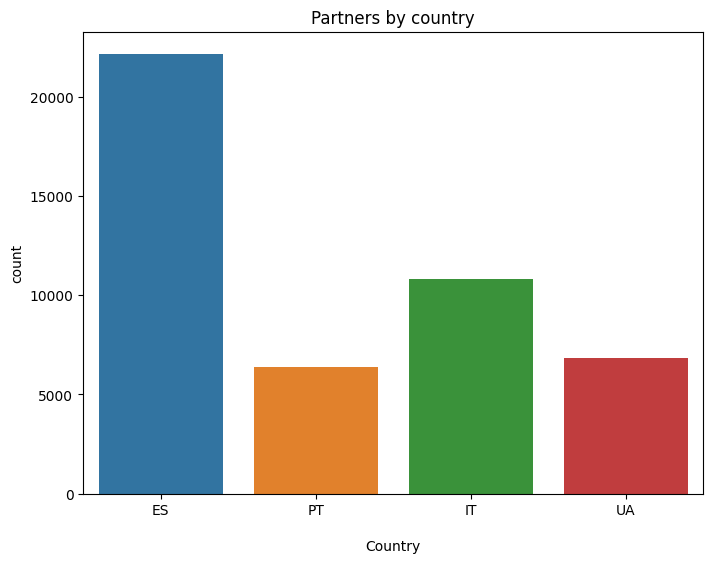

In [299]:
plt.figure(figsize=(8,6))
sns.countplot(x=all_grpd.country)
plt.title('Partners by country')
plt.xlabel('\nCountry')
plt.savefig('country.png')
plt.show()

In [300]:
# per business segment
display(all_grpd.business_segment.value_counts(normalize=True))

business_segment
Long Tail     0.460418
Chain         0.162937
Q-Commerce    0.153869
Local Hero    0.118486
Big Chain     0.080722
Sidekick      0.023567
Name: proportion, dtype: float64

In [301]:
# Long tail 46%
# Chain 16%
# Q-Commerce 15%
# Local Hero 12%
# Big Chain 8%
# Sidekick 2%

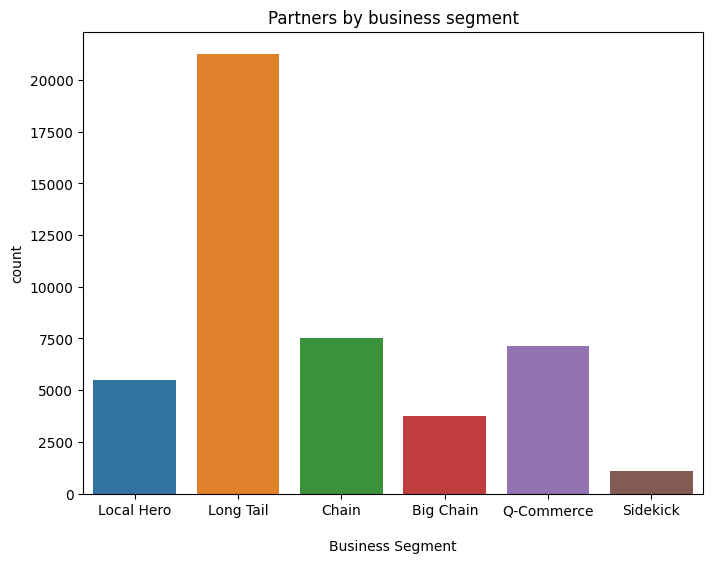

In [302]:
plt.figure(figsize=(8,6))
sns.countplot(x=all_grpd.business_segment)
plt.title('Partners by business segment')
plt.xlabel('\nBusiness Segment')
plt.savefig('business.png')
plt.show()

## 3. What percentage of partners have delivered 80% of the orders?

In [303]:
# sort values by total orders descending
all_grpd_sorted = all_grpd.sort_values(by='total_orders', ascending=False)
# create a column with the cumulative sum of the orders
all_grpd_sorted['cumul_orders'] = all_grpd_sorted.total_orders.cumsum()
# create a column with the coresponding percentage of total orders
all_grpd_sorted['cumul_orders%'] = all_grpd_sorted.cumul_orders.apply(lambda x: (x / all_grpd.total_orders.sum()) * 100)
# count rows being at or below 80% and then find the percentage
count_80 = all_grpd_sorted.partner_id[all_grpd_sorted['cumul_orders%']<=80].count()
answer = (count_80 / all_grpd.partner_id.count()) * 100
print(f'{round(answer)}%')

21%


## 4. What is the average delivery time in Portugal (PT)?

In [304]:
all_grpd.avg_delivery_time_min[all_grpd.country=="PT"].mean()
print(f'{round(all_grpd.avg_delivery_time_min[all_grpd.country=="PT"].mean())} minutes')

35 minutes


## 5. What is the share of orders that integrated partners delivered?

In [305]:
orders_integrated = all_grpd.total_orders[all_grpd.is_integrated==True].sum()
share_integrated = (orders_integrated / all_grpd.total_orders.sum()) * 100
print(f'{round(share_integrated)}%')

57%


## 6. What is the distribution of the cost per order? Does it follow any known distribution? Is there anything odd in the distribution?

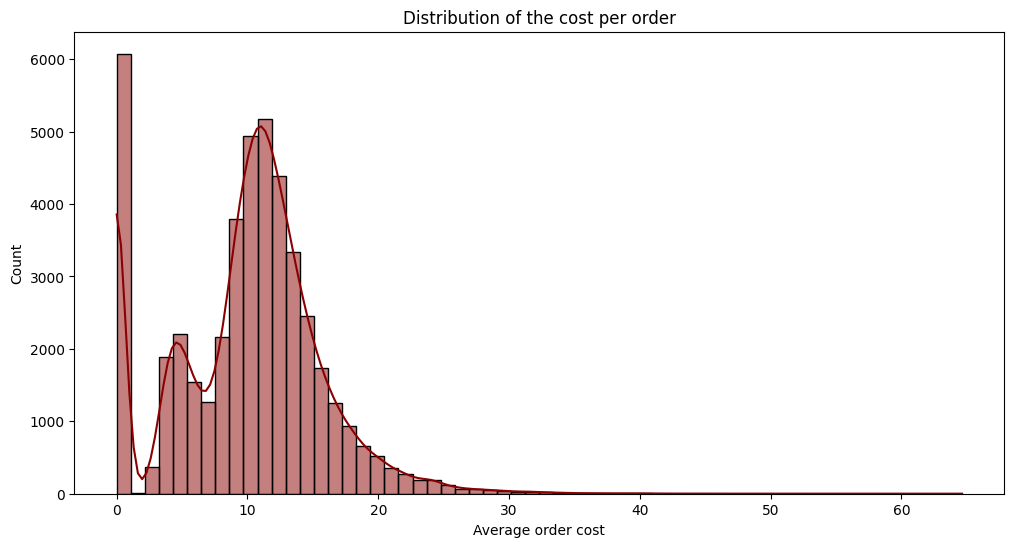

In [306]:
plt.figure(figsize=(12,6))
sns.histplot(all_grpd.avg_order_cost, bins=60, kde=True, color='darkred')
plt.title('Distribution of the cost per order')
plt.xlabel('Average order cost')
plt.show()

In [307]:
print(all_grpd.avg_order_cost.value_counts(normalize=True))
print(all_grpd.avg_order_cost.mode())

avg_order_cost
0.000000     0.131189
9.520500     0.000065
12.303600    0.000043
10.009200    0.000043
3.219810     0.000043
               ...   
10.485258    0.000022
8.634180     0.000022
11.029500    0.000022
10.273367    0.000022
4.657320     0.000022
Name: proportion, Length: 40016, dtype: float64
0    0.0
Name: avg_order_cost, dtype: float64


### The shape of the distribution is multimodal and right skewed. The bulk of the data is at the 3-15 range. There is a very high number of zero cost orders. Below is the distribution after ignoring the zero cost orders.

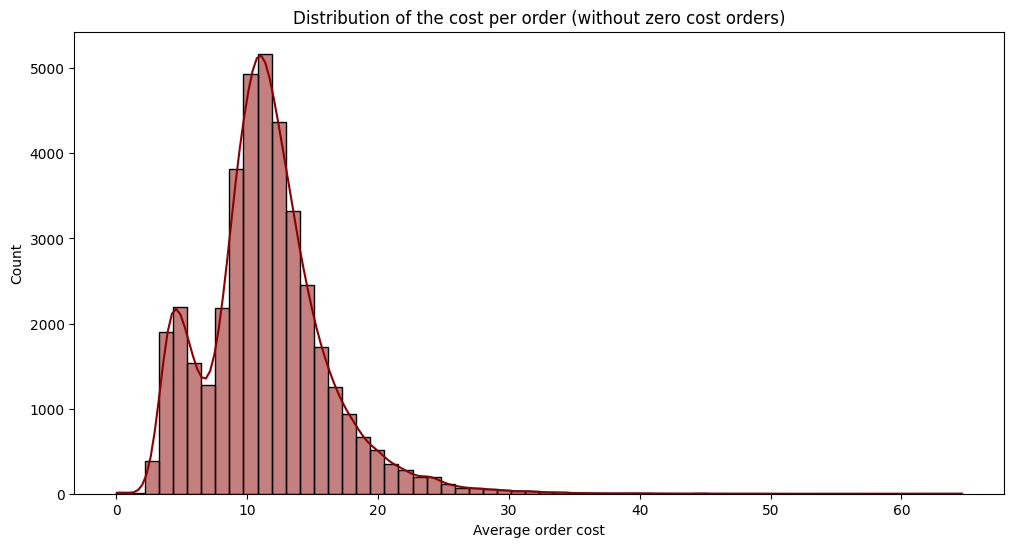

In [308]:
plt.figure(figsize=(12,6))
sns.histplot(all_grpd.avg_order_cost[all_grpd.avg_order_cost > 0], bins=60, kde=True, color='darkred')
plt.title('Distribution of the cost per order (without zero cost orders)')
plt.xlabel('Average order cost')
plt.show()

### The shape is bimodal and right skewed.

## 7. What is the number of orders compared to connected time? Is there a correlation between the two?

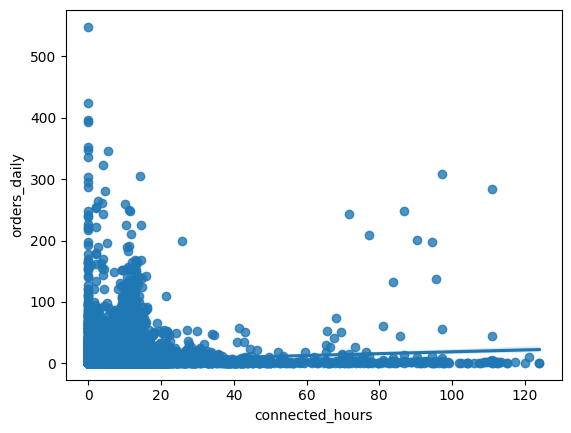

Correlation coefficient: 0.1


In [309]:
sns.regplot(x=all_grpd.connected_hours, y=all_grpd.orders_daily)
plt.show()

print(f'Correlation coefficient: {round(np.corrcoef(all_grpd.connected_hours, all_grpd.orders_daily)[0][1], 1)}')

### The scatter plot with a regression line as well as the correlation coefficient shows a very weak positive linear correlation between number of orders and connected hours

## 8. What are the differences in the metrics for food vs Q-commerce?

In [310]:
print('\nFood:')
display(all_grpd[all_grpd.vertical=='Food'].describe())
print('\nQ-Commerce:')
display(all_grpd[all_grpd.vertical=='Q-commerce'].describe())


Food:


,partner_id,total_orders,total_connected_hours,orders_daily,connected_hours,avg_delivery_time_min,avg_preparation_time_min,avg_order_cost,avg_order_revenue
count,3.909800e+04,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000
mean,5.435148e+06,29.091514,27.009259,4.861806,5.905520,47.077237,11.386703,10.092616,17.556413
std,2.350011e+06,96.082952,33.552964,13.662633,5.426095,32.852412,7.856601,5.926439,8.898046
min,9.100000e+02,1.000000,0.000000,1.000000,0.000000,2.508333,0.000000,0.000000,0.000000
25%,3.985272e+06,3.000000,4.000000,1.000000,2.000000,27.932883,8.096887,7.089677,11.793458
50%,6.004548e+06,8.000000,17.000000,2.000000,5.571429,33.940833,11.573777,10.773848,17.019655
75%,7.301504e+06,22.000000,41.000000,3.666667,9.000000,45.349306,15.011181,13.354930,22.051469
max,8.721260e+06,3836.000000,534.000000,548.000000,113.000000,240.550000,646.170000,63.490500,169.380000



Q-Commerce:


,partner_id,total_orders,total_connected_hours,orders_daily,connected_hours,avg_delivery_time_min,avg_preparation_time_min,avg_order_cost,avg_order_revenue
count,7.110000e+03,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000
mean,6.058663e+06,17.504219,26.392264,3.260669,6.917343,33.202915,12.534223,8.851049,11.738447
std,1.805924e+06,69.420540,67.985571,10.331007,14.428035,15.098298,6.383968,4.950107,8.455756
min,2.710000e+03,1.000000,0.000000,1.000000,0.000000,5.016667,0.000000,0.000000,-8.798018
25%,4.740622e+06,2.000000,0.000000,1.000000,0.000000,24.146875,8.534688,4.680724,6.809863
50%,6.486372e+06,5.000000,2.000000,1.500000,0.666667,30.121922,11.977279,8.611373,10.335579
75%,7.584354e+06,14.000000,26.000000,2.750000,9.333333,38.457986,15.602383,11.884291,14.323597
max,8.718035e+06,2157.000000,848.000000,308.142857,124.000000,218.600000,59.570000,64.643340,325.943310


## 9. Among all the possible combinations of dimensions (segments), which one has the highest number of partners?

In [311]:
# create a column that combines the dimensions of each cell
all_grpd['seg_comb'] = all_grpd.apply(lambda row: row.vertical + row.business_segment + str(row.is_integrated) + row.country, axis=1)
print(all_grpd.seg_comb.value_counts().head())
print(all_grpd.seg_comb.value_counts(normalize=True).head())

seg_comb
FoodLong TailFalseES          10297
FoodLong TailFalseIT           5983
FoodLong TailFalsePT           2646
Q-commerceQ-CommerceTrueUA     2303
FoodBig ChainTrueES            2161
Name: count, dtype: int64
seg_comb
FoodLong TailFalseES          0.222840
FoodLong TailFalseIT          0.129480
FoodLong TailFalsePT          0.057263
Q-commerceQ-CommerceTrueUA    0.049840
FoodBig ChainTrueES           0.046767
Name: proportion, dtype: float64


### The combination of `Food - Long Tail - Not Integrated - ES` has the highest number of partners.